In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# from scipy import signal
# from scipy.io import wavfile

from tqdm.notebook import tqdm

import librosa
import librosa.display

import torch
import torch.nn as nn

from common_audio import *
from audio_dataset import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dtype = torch.float

print(device)

cpu


In [2]:
def generate_tones(sr, duration, freq, amplitude=None):
    if amplitude is None:
        amplitude = np.ones_like(freq)
    freq, amplitude = freq[:, None], amplitude[:, None]
    length = int(sr*duration)
    full = np.tile(np.arange(length), (freq.shape[1], 1))
    y = amplitude * np.sin(2*np.pi/sr * freq * full)
    return y


In [62]:
sr=10000
duration=4.9
y = generate_tones(sr, duration, np.array([1000]))[0]
y +=generate_tones(sr, duration, np.array([2000]), np.array([0.5]))[0]

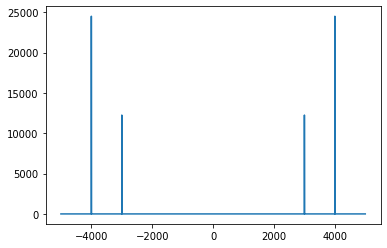

In [63]:
y_f = np.abs(np.fft.fftn(y))

T = 1/sr
N = y_f.shape[0]

left = -T*y_f.shape[0]/2
right = T*y_f.shape[0]/2


x_f = np.linspace(-1.0/(2.0*T), 1.0/(2.0*T), N) 

plt.plot(x_f, y_f)
plt.show()

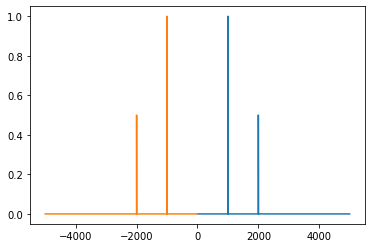

In [79]:
# xf = np.linspace(0.0, sr/2, N//2) 
# plt.plot(xf, 2.0/N * y_f[0:N//2])

xf = np.linspace(-sr/2, sr/2, N) 
plt.plot(xf[N//2:], 2.0/N * y_f[:N//2])
plt.plot(xf[:N//2], 2.0/N * y_f[N//2:])
